### Importing the required libraries

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

### Importing the Dataset

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/titanic/Iris.csv')
df.head()
X = df.iloc[:,1:-1]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### We are doing clustering, but how do we know how many clusters to produce?
####Enter the "Elbow method"

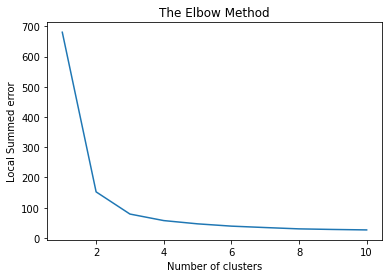

In [ ]:
errors = []
for i in range(1,11):
    clf = KMeans(n_clusters=i)
    clf.fit(X)
    errors.append(clf.inertia_)
 
plt.plot(range(1,11),errors)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Local Summed error')
plt.show()
 
#3 is the bending point, therefore we chose 3 as optimal value for number of clusters

### Now we apply KMeans with optimal number of clusters and visualize it

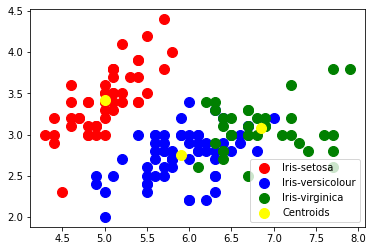

In [36]:
clf = KMeans(n_clusters=3)
X['Cluster'] = clf.fit_predict(X)
 
 
plt.scatter(X[X.loc[:,'Cluster'] == 0].iloc[:,0],X[X.loc[:,'Cluster'] == 0].iloc[:,1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[X.loc[:,'Cluster'] == 1].iloc[:,0],X[X.loc[:,'Cluster'] == 1].iloc[:,1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[X.loc[:,'Cluster'] == 2].iloc[:,0],X[X.loc[:,'Cluster'] == 2].iloc[:,1],
            s = 100, c = 'green', label = 'Iris-virginica')
 
 
plt.scatter(clf.cluster_centers_[:, 0],clf.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
 
plt.legend()